# 연습문제 5번

## Error BackPropagation  BP

## Neural Networks with a Single Hidden Layer

### load watermelon 3.0 data

In [3]:
import sklearn
import numpy as np
import pandas as pd
from pathlib import Path

data_dir = Path('./data/chapter4_dataset.csv')
df = pd.read_csv(data_dir)
df = df.drop(['Idx'], axis=1)

In [4]:
df

,color,root,knocks,texture,navel,touch,density,sugar_ratio,label
0,dark_green,curl_up,little_heavily,distinct,sinking,hard_smooth,0.697,0.460,1
1,black,curl_up,heavily,distinct,sinking,hard_smooth,0.774,0.376,1
2,black,curl_up,little_heavily,distinct,sinking,hard_smooth,0.634,0.264,1
3,dark_green,curl_up,heavily,distinct,sinking,hard_smooth,0.608,0.318,1
4,light_white,curl_up,little_heavily,distinct,sinking,hard_smooth,0.556,0.215,1
5,dark_green,little_curl_up,little_heavily,distinct,little_sinking,soft_stick,0.403,0.237,1
6,black,little_curl_up,little_heavily,little_blur,little_sinking,soft_stick,0.481,0.149,1
7,black,little_curl_up,little_heavily,distinct,little_sinking,hard_smooth,0.437,0.211,1
8,black,little_curl_up,heavily,little_blur,little_sinking,hard_smooth,0.666,0.091,0
9,dark_green,stiff,clear,distinct,even,soft_stick,0.243,0.267,0


In [5]:
categorical_att = ['color', 'root', 'knocks', 'texture', 'navel', 'touch']
df = pd.get_dummies(df, columns=categorical_att)

In [6]:
df

,density,sugar_ratio,label,color_black,color_dark_green,color_light_white,root_curl_up,root_little_curl_up,root_stiff,knocks_clear,knocks_heavily,knocks_little_heavily,texture_blur,texture_distinct,texture_little_blur,navel_even,navel_little_sinking,navel_sinking,touch_hard_smooth,touch_soft_stick
0,0.697,0.460,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
1,0.774,0.376,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0
2,0.634,0.264,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
3,0.608,0.318,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0
4,0.556,0.215,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0
5,0.403,0.237,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
6,0.481,0.149,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
7,0.437,0.211,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
8,0.666,0.091,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
9,0.243,0.267,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1


In [7]:
x, y = df.drop(['label'], axis=1).values, df['label'].values[..., np.newaxis]

### 표준 BP Algorithm

In [32]:
class NNBP:
    def __init__(self, lr=0.1, epochs=100, n_hidden_layer_node=10):
        self.lr = lr
        self.epochs = epochs
        self.n_hidden_layer_node = n_hidden_layer_node
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def update(self, x_, y_):
        b = self.sigmoid(np.dot(x_, self.v) - self.gamma)  # 1 x n_hidden_layer_node
        y_hat = self.sigmoid(np.dot(b, self.w) - self.theta)  # 1 x n_output_node
        g = y_hat * (1 - y_hat) * (y_ - y_hat)  # 1 x n_output_node
        e = b * (1 - b) * np.dot(g, self.w.T)  # 1 x n_hidden_layer_node
        
        self.w += self.lr * np.dot(b.T, g)
        self.theta -= self.lr * g
        self.v += self.lr * np.dot(x_.T, e)
        self.gamma -= self.lr * e
        
    def mse(self, y_hat, y_):
        return np.mean((y_hat - y_)**2)
    
    def accuracy(self, y_hat, y_):
        return np.mean((y_hat >= 0.5).astype(np.int) == y_)
    
    def fit(self, x, y):
        n_input_node = x.shape[-1]
        n_output_node = y.shape[-1]
        
        self.length = len(x)
        
        self.w = np.random.randn(self.n_hidden_layer_node, n_output_node)
        self.theta = np.zeros((1, n_output_node))
        
        self.v = np.random.randn(n_input_node, self.n_hidden_layer_node)
        self.gamma = np.zeros((1, self.n_hidden_layer_node))
        
        loss_lst = []
        acc_lst = []
        
        for j in range(self.epochs):
            for i in range(self.length):
                x_, y_ = x[i:i+1], y[i:i+1]  # 1x19  1x1

                self.update(x_, y_)

            pred = self.predict(x)
            loss = self.mse(pred, y)
            acc = self.accuracy(pred, y)
            
            loss_lst += [loss]
            acc_lst += [acc]
            
            print("EPOCHS: {} | LOSS: {} | ACC: {}".format(j, loss, acc))
            
        return loss_lst, acc_lst
            
    def predict(self, x):
        return self.sigmoid(np.dot(self.sigmoid(np.dot(x, self.v) - self.gamma), self.w) - self.theta)

In [46]:
model = NNBP(epochs=500)

In [47]:
loss_lst1, acc_lst1 = model.fit(x, y)

EPOCHS: 0 | LOSS: 0.40378505131823134 | ACC: 0.47058823529411764
EPOCHS: 1 | LOSS: 0.4019319349734437 | ACC: 0.47058823529411764
EPOCHS: 2 | LOSS: 0.40005726466970987 | ACC: 0.47058823529411764
EPOCHS: 3 | LOSS: 0.39816164143565663 | ACC: 0.47058823529411764
EPOCHS: 4 | LOSS: 0.3962457208675991 | ACC: 0.47058823529411764
EPOCHS: 5 | LOSS: 0.39431021357580276 | ACC: 0.47058823529411764
EPOCHS: 6 | LOSS: 0.39235588538600963 | ACC: 0.47058823529411764
EPOCHS: 7 | LOSS: 0.39038355727881385 | ACC: 0.47058823529411764
EPOCHS: 8 | LOSS: 0.38839410505065414 | ACC: 0.47058823529411764
EPOCHS: 9 | LOSS: 0.38638845868167715 | ACC: 0.47058823529411764
EPOCHS: 10 | LOSS: 0.3843676013974965 | ACC: 0.47058823529411764
EPOCHS: 11 | LOSS: 0.38233256841394114 | ACC: 0.47058823529411764
EPOCHS: 12 | LOSS: 0.38028444535624223 | ACC: 0.47058823529411764
EPOCHS: 13 | LOSS: 0.37822436634673284 | ACC: 0.47058823529411764
EPOCHS: 14 | LOSS: 0.37615351175801726 | ACC: 0.47058823529411764
EPOCHS: 15 | LOSS: 0.37

C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


### 누적 BP Algorithm

In [48]:
class NNBP:
    def __init__(self, lr=0.1, epochs=100, n_hidden_layer_node=10):
        self.lr = lr
        self.epochs = epochs
        self.n_hidden_layer_node = n_hidden_layer_node
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def update(self, x_, y_):
        b = self.sigmoid(np.dot(x_, self.v) - self.gamma)  # n x n_hidden_layer_node
        y_hat = self.sigmoid(np.dot(b, self.w) - self.theta)  # n x n_output_node
        g = y_hat * (1 - y_hat) * (y_ - y_hat)  # n x n_output_node
        e = b * (1 - b) * np.dot(g, self.w.T)  # n x n_hidden_layer_node
        
        self.w += self.lr * np.dot(b.T, g) / self.length
        self.theta -= np.mean(self.lr * g, axis=0)
        self.v += self.lr * np.dot(x_.T, e) / self.length
        self.gamma -= np.mean(self.lr * e, axis=0)
        
    def mse(self, y_hat, y_):
        return np.mean((y_hat - y_)**2)
    
    def accuracy(self, y_hat, y_):
        return np.mean((y_hat >= 0.5).astype(np.int) == y_)
    
    def fit(self, x, y):
        n_input_node = x.shape[-1]
        n_output_node = y.shape[-1]
        
        self.length = len(x)
        
        self.w = np.random.randn(self.n_hidden_layer_node, n_output_node)
        self.theta = np.zeros((1, n_output_node))
        
        self.v = np.random.randn(n_input_node, self.n_hidden_layer_node)
        self.gamma = np.zeros((1, self.n_hidden_layer_node))
        
        loss_lst = []
        acc_lst = []
        
        for j in range(self.epochs):
            self.update(x, y)

            pred = self.predict(x)
            loss = self.mse(pred, y)
            acc = self.accuracy(pred, y)
            
            loss_lst += [loss]
            acc_lst += [acc]
            
            print("EPOCHS: {} | LOSS: {} | ACC: {}".format(j, loss, acc))

        return loss_lst, acc_lst
            
    def predict(self, x):
        return self.sigmoid(np.dot(self.sigmoid(np.dot(x, self.v) - self.gamma), self.w) - self.theta)

In [49]:
model = NNBP(epochs=500)
loss_lst2, acc_lst2 = model.fit(x, y)

EPOCHS: 0 | LOSS: 0.36696062256640427 | ACC: 0.5882352941176471
EPOCHS: 1 | LOSS: 0.3667491548275632 | ACC: 0.5882352941176471
EPOCHS: 2 | LOSS: 0.3665376206536394 | ACC: 0.5882352941176471
EPOCHS: 3 | LOSS: 0.36632601461550973 | ACC: 0.5882352941176471
EPOCHS: 4 | LOSS: 0.36611433128183135 | ACC: 0.5882352941176471
EPOCHS: 5 | LOSS: 0.36590256521915954 | ACC: 0.5882352941176471
EPOCHS: 6 | LOSS: 0.3656907109920657 | ACC: 0.5882352941176471
EPOCHS: 7 | LOSS: 0.3654787631632588 | ACC: 0.5882352941176471
EPOCHS: 8 | LOSS: 0.3652667162937078 | ACC: 0.5882352941176471
EPOCHS: 9 | LOSS: 0.3650545649427673 | ACC: 0.5882352941176471
EPOCHS: 10 | LOSS: 0.3648423036683035 | ACC: 0.5882352941176471
EPOCHS: 11 | LOSS: 0.36462992702682334 | ACC: 0.5882352941176471
EPOCHS: 12 | LOSS: 0.36441742957360557 | ACC: 0.5882352941176471
EPOCHS: 13 | LOSS: 0.3642048058628333 | ACC: 0.5882352941176471
EPOCHS: 14 | LOSS: 0.36399205044772864 | ACC: 0.5882352941176471
EPOCHS: 15 | LOSS: 0.36377915788069004 | AC

C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


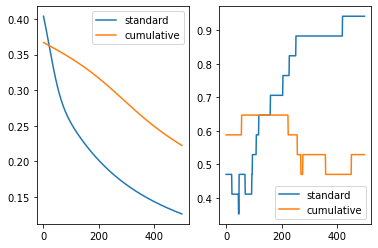

In [50]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.plot(loss_lst1, label='standard')
plt.plot(loss_lst2, label='cumulative')
plt.legend()

plt.subplot(122)
plt.plot(acc_lst1, label='standard')
plt.plot(acc_lst2, label='cumulative')
plt.legend()

plt.show()